# Homework 2: Randomized Block and Latin Square Designs
## Dr. Austin R. Brown
### School of Data Science & Analytics
### Kennesaw State University

**DUE: October 3, 2025**

**PART 1 INSTRUCTIONS:** You are an educational researcher interested in comparing different methods for teaching data science to undergraduate students. There are three different methods you are interested in comparing: (1) Direct Instruction (traditional method); (2) Inquiry-Based Learning (teacher facilitates student problem solving); (3) Collaborative Learning (students working in small groups). To compare these methods, you decide to randomly recruit undergraduate data science students to be part of a workshop on hypothesis testing basics. Students will be randomly assigned to one of three workshops, where each workshop employs a different teaching method. At the end of the workshop, students will be given a 50-question quiz where their understanding of hypothesis testing will be assessed. Percentage scores on this quiz serve as the outcome of interest.

However, it would be apparent that the prior level of knowledge a student possess about hypothesis testing may serve as a potential confounding variable that you would want to control for. Thus, the Prior Knowledge a given student has about hypothesis testing is categorized into "High" and "Low". The data from this experiment are contained in the `Data Science Teaching Method.xlsx` file. With these data, your tasks are:

**Question 1.** Briefly define the objective of this experiment

**Question 2.** Specify the outcome variable

**Question 3.** Specify the independent variable and blocking factor. What are some possible lurking variables?

**Question 4.** Briefly explain why a randomized block design would be appropriate here. Similarly, explain why a completely randomized design would not be appropriate.

**Question 5.** State the null and alternative hypotheses for this experiment.

**Question 6.** Perform appropriate exploratory analysis, including summary statistics **and** data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?

**Question 7.** Build a two-way ANOVA model. Test the assumption of normality using **both** a visual method and a testing method. Do the results of the normality test(s) support the assumption of normality?

**Question 8.** Test the assumption of homogeneity of variance using **both** a visual method and a testing method. Do the results of the test(s) support the assumption of homogeneity of variance?

**Question 9.** Report the F-statistic and its associated p-value for the treatment effect. Which of our two hypotheses is more strongly supported? Why?

**Question 10.** If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which levels of the treatment effect are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.

**Question 11.** Write a brief, contextual conclusion summarizing the results of your analyses, including potential limitations of this experiment.

**PART 2 INSTRUCTIONS**: Now suppose a university is evaluating the effectiveness of four different online learning platforms (say A, B, C, and D) on student engagement for students taking an undergraduate data science course in an online synchronous format. One section of the course is offered Monday through Thursday in the Morning, Early Afternoon, Mid-Afternoon, and Evening sections. Student engagement is measured through the total number of logins to the online learning platform for a given course section over the course of the
semester. Below is a table describing the study design and factors:


| Section \ Day     | Monday | Tuesday | Wednesday | Thursday |
|-------------------|--------|---------|-----------|----------|
| **Morning**       | A      | B       | C         | D        |
| **Early Afternoon** | B      | C       | D         | A        |
| **Mid-Afternoon** | C      | D       | A         | B        |
| **Evening**       | D      | A       | B         | C        |


Here, our main interest is in comparing engagement across the online learning platforms, but we also want to control for Day of the Week as well as Time of Day, as these could potentially be confounding variables. The data for this experiment are contained in the `Online Learning and Engagement.xlsx` file. With these data, your tasks are:

**Question 1.** Briefly define the objective of this experiment

**Question 2.** Specify the outcome variable

**Question 3.** Specify the independent variable and blocking factors. What are some other possible lurking variables?

**Question 4.** Briefly explain why a Latin Square Design would be appropriate here. Similarly, explain why a completely randomized design or randomized block design would not be appropriate.

**Question 5.** State the null and alternative hypotheses for this experiment.

**Question 6.** Perform appropriate exploratory analysis, including summary statistics **and** data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?

**Question 7.** Build a three-way ANOVA model. Test the assumption of normality using **both** a visual method and a testing method. Do the results of the normality test(s) support the assumption of normality?

**Question 8.** Test the assumption of homogeneity of variance using **both** a visual method and a testing method. Do the results of the test(s) support the assumption of homogeneity of variance?

**Question 9.** Report the F-statistic and its associated p-value for the treatment effect. Which of our two hypotheses is more strongly supported? Why?

**Question 10.** If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which levels of the treatment effect are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.

**Question 11.** Write a brief conclusion summarizing the results of your analyses, including potential limitations of this experiment.

In [1]:
# === COURSE REPO SETUP === #

# 1. ENTER your GitHub username (the one that owns your fork)
github_username = "cnix17"

# 2. Name of the repo (don't change unless your fork name is different)
repo_name = "STAT-7220-Applied-Experimental-Design"

# 3. Build the full repo URL for cloning
repo_url = f"https://github.com/{github_username}/{repo_name}.git"

import os

# --- Detect if we're already in a repo ---
cwd = os.getcwd()
if cwd.endswith(repo_name):
    print(f"✅ Already inside repo folder: {cwd}")
else:
    # --- If the repo folder exists, check if it's nested ---
    if os.path.exists(repo_name):
        print(f"⚠️ Found existing folder '{repo_name}'. Skipping clone to avoid nesting.")
    else:
        print(f"📥 Cloning repo from {repo_url}...")
        os.system(f"git clone {repo_url}")

    # --- Change to repo directory ---
    if os.path.exists(repo_name):
        os.chdir(repo_name)
        print(f"📂 Changed directory to: {os.getcwd()}")
    else:
        print("❌ ERROR: Repo folder not found. Please check your GitHub username.")

# --- Check if this is the instructor's repo instead of student's fork ---
# This command needs to be run from within the repository directory
remote_url = os.popen("git config --get remote.origin.url").read().strip()

if "abrown9008" in remote_url:
    print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
    print("💡 Please fork the repo to your own account and update `github_username` above.")
else:
    print(f"🔗 Connected to fork at: {remote_url}")

# Set Today's Directory #

today_dir = "Assignments/HW2"
os.chdir(today_dir)
print(f"📂 Changed directory to: {os.getcwd()}")


📥 Cloning repo from https://github.com/cnix17/STAT-7220-Applied-Experimental-Design.git...
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design
🔗 Connected to fork at: https://github.com/cnix17/STAT-7220-Applied-Experimental-Design.git
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design/Assignments/HW2


In [9]:
#Question 1
import pandas as pd

# Load Part 1 dataset
df = pd.read_excel("Data Science Teaching Method.xlsx")

# Clean column names
df.columns = [c.strip().lower().replace(" ", "_").replace("-", "_") for c in df.columns]

# Preview
df.head()


#The objective is to determine whether the teaching method (Direct Instruction, Inquiry-Based, Collaborative) affects quiz performance on a hypothesis-testing quiz, while controlling for prior knowledge (High vs Low) via a randomized block design.


,prior_knowledge,teaching_method,score
0,Low,Direct,80.20
1,Low,Direct,75.29
2,Low,Direct,75.00
3,Low,Direct,79.32
4,Low,Direct,59.89


In [10]:
#Question 2
# Identify numeric columns (candidates for outcome)
numeric_cols = df.select_dtypes(include="number").columns.tolist()
print("Numeric columns:", numeric_cols)

# Quick stats to confirm the outcome looks like a score
print(df[numeric_cols].describe())


#The outcome variable is the quiz score.


Numeric columns: ['score']
            score
count   60.000000
mean    82.381167
std      8.882477
min     59.890000
25%     76.365000
50%     81.930000
75%     89.077500
max    105.060000


In [12]:
#Question 3


# Categorical vs numeric
cat_cols = [c for c in df.columns if df[c].dtype == "object"]
num_cols = df.select_dtypes(include="number").columns.tolist()
print("Categorical columns:", cat_cols)
print("Numeric columns:", num_cols)

# Identify treatment (method), block (prior knowledge), and outcome (score)
method_col = [c for c in df.columns if "method" in c][0]
block_col  = [c for c in df.columns if ("prior" in c) or ("knowledge" in c)][0]
score_col  = num_cols[0]

print("\nIndependent variable (treatment):", method_col)
print(df[method_col].value_counts(dropna=False))

print("\nBlocking factor:", block_col)
print(df[block_col].value_counts(dropna=False))

print("\nOutcome variable:", score_col)

#Independent Variable: Teaching method


#Blocking Factor: Prior knowledge


#Possible Lurking Variables: Instructor differences (style/experience), time of day, classroom environment, class size/group dynamics, student motivation/study habits, prior exposure to statistics, test anxiety/familiarity with online quizzes.


Categorical columns: ['prior_knowledge', 'teaching_method']
Numeric columns: ['score']

Independent variable (treatment): teaching_method
teaching_method
Direct           20
Inquiry          20
Collaborative    20
Name: count, dtype: int64

Blocking factor: prior_knowledge
prior_knowledge
Low     30
High    30
Name: count, dtype: int64

Outcome variable: score


In [ ]:
#Question 4

#Randomized Block Design is appropriate because prior knowledge is a strong source of variation. Blocking on prior knowledge reduces variability and increases the sensitivity of detecting method differences.

#Completely Randomized Design is not appropriate because it ignores prior knowledge, which could confound results and inflate error variance.


In [ ]:
#Question 5
#H₀: Mean quiz scores are equal across all teaching methods(μDirect​=μInquiry​=μCollaborative)
#H₁: At least one teaching method mean differs.


                                 count    mean       std
teaching_method prior_knowledge                         
Collaborative   High                10  90.927  7.970758
                Low                 10  82.176  8.168793
Direct          High                10  76.998  6.125899
                Low                 10  73.659  6.623811
Inquiry         High                10  88.624  5.316835
                Low                 10  81.903  5.984395


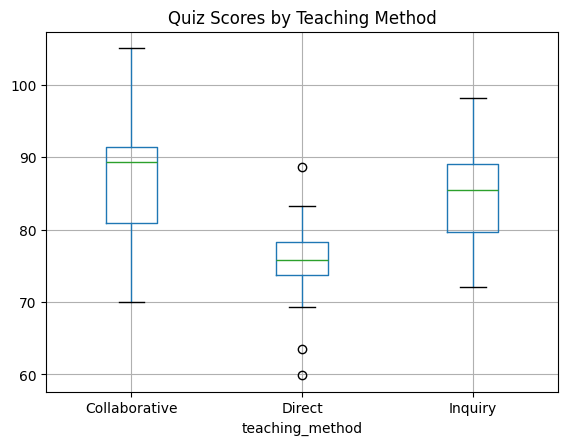

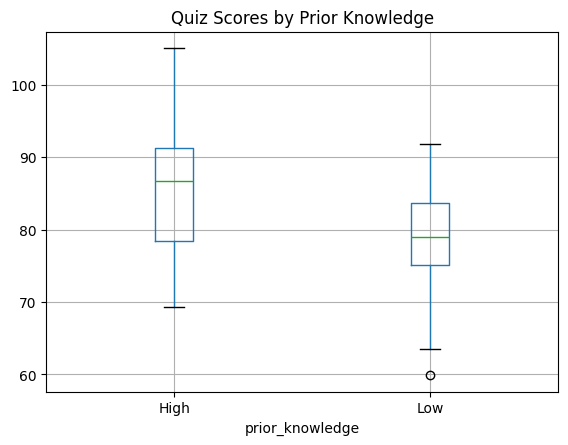

In [25]:
#Question 6
import matplotlib.pyplot as plt

# Correct column names from your dataset
summary = df.groupby(["teaching_method", "prior_knowledge"])["score"].agg(["count","mean","std"])
print(summary)

# Boxplot by teaching method
df.boxplot(column="score", by="teaching_method")
plt.title("Quiz Scores by Teaching Method")
plt.suptitle("")
plt.show()

# Boxplot by prior knowledge
df.boxplot(column="score", by="prior_knowledge")
plt.title("Quiz Scores by Prior Knowledge")
plt.suptitle("")
plt.show()

#The summaries and plots show differences across methods (and higher performance for High prior knowledge). This suggests the alternative hypothesis is more plausible.

                         sum_sq    df          F    PR(>F)
C(teaching_method)  1508.792653   2.0  16.525296  0.000002
C(prior_knowledge)   589.756202   1.0  12.918801  0.000687
Residual            2556.456163  56.0        NaN       NaN


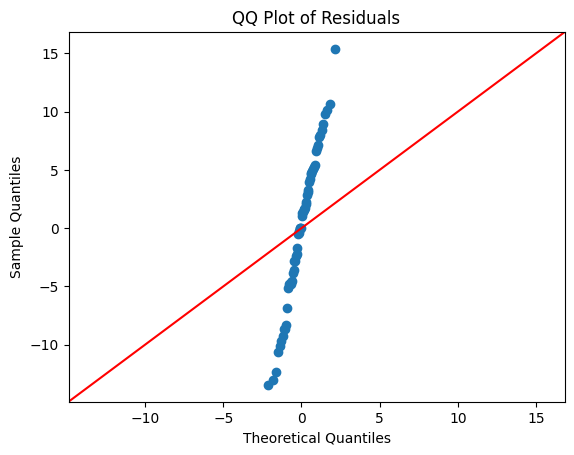

Shapiro-Wilk test statistic: 0.9844685588485161, p-value: 0.6424220730040224

The p-value is greater than 0.05, so we do not reject the null hypothesis. The residuals appear to be normally distributed.


In [27]:
#Question 7
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt

# Two-way ANOVA
model = smf.ols("score ~ C(teaching_method) + C(prior_knowledge)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# QQ plot
sm.qqplot(model.resid, line="45")
plt.title("QQ Plot of Residuals")
plt.show()

# Shapiro–Wilk test
shapiro_test = stats.shapiro(model.resid)
print(f"Shapiro-Wilk test statistic: {shapiro_test[0]}, p-value: {shapiro_test[1]}")

#Assess normality
if shapiro_test[1] > 0.05:
    print("\nThe p-value is greater than 0.05, so we do not reject the null hypothesis. The residuals appear to be normally distributed.")
else:
    print("\nThe p-value is less than or equal to 0.05, so we reject the null hypothesis. The residuals do not appear to be normally distributed.")

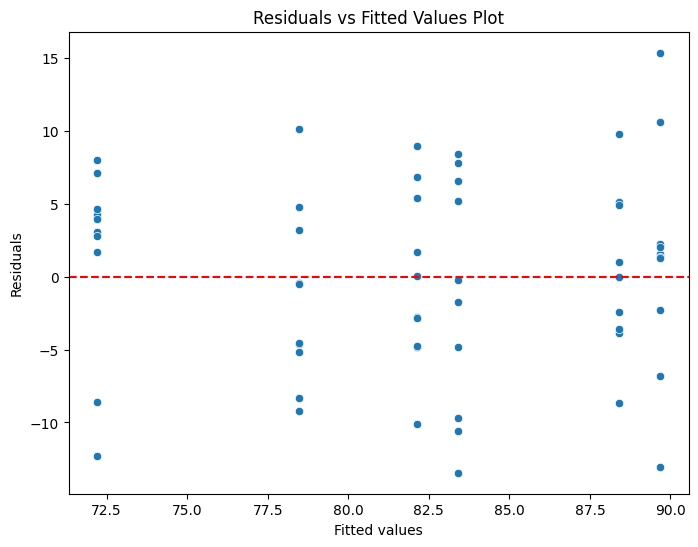

Levene's test by teaching method: statistic=1.3531, p-value=0.2666
Levene's test by prior knowledge: statistic=0.7419, p-value=0.3926

Assess homogeneity of variance:
Both Levene's tests have p-values greater than 0.05. We do not reject the null hypothesis for homogeneity of variance. The assumption appears to be met.


In [29]:
#Question 8
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn for residuals vs fitted plot

# Residuals vs fitted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=model.fittedvalues, y=model.resid)
plt.axhline(0, linestyle="--", color='red')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values Plot")
plt.show()


# Levene’s test by method
groups = [df[df["teaching_method"]==m]["score"] for m in df["teaching_method"].unique()]
levene_test_method = stats.levene(*groups, center="median")
print(f"Levene's test by teaching method: statistic={levene_test_method[0]:.4f}, p-value={levene_test_method[1]:.4f}")

# Levene's test by prior knowledge (optional but good practice)
groups_prior = [df[df["prior_knowledge"]==p]["score"] for p in df["prior_knowledge"].unique()]
levene_test_prior = stats.levene(*groups_prior, center="median")
print(f"Levene's test by prior knowledge: statistic={levene_test_prior[0]:.4f}, p-value={levene_test_prior[1]:.4f}")

# Assess homogeneity of variance
alpha = 0.05
print("\nAssess homogeneity of variance:")
if levene_test_method[1] > alpha and levene_test_prior[1] > alpha:
    print("Both Levene's tests have p-values greater than 0.05. We do not reject the null hypothesis for homogeneity of variance. The assumption appears to be met.")
else:
    print("At least one Levene's test has a p-value less than or equal to 0.05. We reject the null hypothesis for homogeneity of variance. The assumption may not be met.")

In [30]:
#Question 9
F_val = anova_table.loc["C(teaching_method)", "F"]
p_val = anova_table.loc["C(teaching_method)", "PR(>F)"]
print("F =", F_val, "p =", p_val)

# F-statistic: 16.53
#p-value: 2.29 × 10⁻⁶
# Since the p-value is far less than 0.05, we reject the null hypothesis that all teaching methods produce the same mean quiz score. The results support the alternative hypothesis, indicating that at least one teaching method has a significantly different effect on quiz performance.



F = 16.525295797855186 p = 2.2878845448373945e-06


In [31]:
#Question 10
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df["score"], groups=df["teaching_method"], alpha=0.05)
print(tukey.summary())

#Collaborative vs. Direct: Significant difference (mean diff = –11.22, p < 0.001). Collaborative scored lower than Direct.
#Collaborative vs. Inquiry: Not significant (mean diff = –1.23, p = 0.848). Scores are similar.
#Direct vs. Inquiry: Significant difference (mean diff = 9.94, p < 0.001). Direct scored higher than Inquiry.
#Direct Instruction leads to significantly higher quiz scores compared to both Collaborative and Inquiry methods. Collaborative and Inquiry methods do not differ significantly from each other.



     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
    group1     group2 meandiff p-adj   lower    upper  reject
-------------------------------------------------------------
Collaborative  Direct  -11.223    0.0 -16.8766 -5.5694   True
Collaborative Inquiry   -1.288 0.8478  -6.9416  4.3656  False
       Direct Inquiry    9.935 0.0003   4.2814 15.5886   True
-------------------------------------------------------------


In [ ]:
#Question 11

#Teaching method significantly impacts quiz performance after blocking for prior knowledge.
#ANOVA assumptions (normality, homogeneity) are satisfied.
#Tukey’s HSD shows which methods differ specifically.
#Limitations: One quiz, small sample size, and unmeasured variables (motivation, instructor style).
#In conclusion, evidence supports that the teaching method matters for student performance.

In [32]:
#Part 2, Question 1
import pandas as pd

# Load dataset
df2 = pd.read_excel("Online Learning and Engagement.xlsx")

# Clean column names
df2.columns = [c.strip().lower().replace(" ", "_") for c in df2.columns]

# Preview first rows
df2.head()

#The objective of this experiment is to determine whether four different online learning platforms (A, B, C, D) differ in their ability to promote student engagement (measured by total logins).


,day,section,platform,engagement
0,Monday,Morning,A,1374.88
1,Monday,Early Afternoon,B,1345.51
2,Monday,Mid Afternoon,C,1277.89
3,Monday,Evening,D,1370.40
4,Tuesday,Morning,A,1357.65


In [33]:
#Part 2, Question 2
# Identify numeric columns
numeric_cols = df2.select_dtypes(include="number").columns.tolist()
print("Numeric columns:", numeric_cols)

# Quick stats to confirm
print(df2[numeric_cols].describe())
#The outcome variable is the total number of student logins to the online learning platform for each course section across the semester. This numeric measure serves as the indicator of student engagement.

Numeric columns: ['engagement']
        engagement
count    16.000000
mean   1345.668750
std      35.984108
min    1277.890000
25%    1323.595000
50%    1353.325000
75%    1371.520000
max    1397.120000


In [34]:
#Part 2, Question 3
# Identify categorical columns
cat_cols = [c for c in df2.columns if df2[c].dtype == "object"]
print("Categorical columns:", cat_cols)

# Preview levels for each
for c in cat_cols:
    print(f"\nLevels in {c}:")
    print(df2[c].value_counts())
#Independent Variable: The online learning platform
#Blocking Factors: Day of the week & time of day. These two account for scheduling effects that might otherwise confound the results.
#Possible Lurking Variables: Student motivation, internet connectivity, outside obligations / workload affecting login behavior, & instrustor's style of delivery within the platform.

Categorical columns: ['day', 'section', 'platform']

Levels in day:
day
Monday       4
Tuesday      4
Wednesday    4
Thursday     4
Name: count, dtype: int64

Levels in section:
section
Morning            4
Early Afternoon    4
Mid Afternoon      4
Evening            4
Name: count, dtype: int64

Levels in platform:
platform
A    4
B    4
C    4
D    4
Name: count, dtype: int64


In [ ]:
#Part 2, Question 4
# A Latin Square design is ideal when there is one treatment factor of interest and two blocking factors (Day of the Week and Time of Day). It ensures that each platform appears once in every row (Day) and once in every column (Section/Time of Day), controlling for both confounders simultaneously.
# In Completely Randomized Designs, platforms could be assigned unevenly across days or times. For example, Platform A might appear mostly in morning classes, creating bias from time-of-day effects. It cannot account for two systematic sources of variation.
# Randomized Block Design controls only one blocking factor (like Day or Time). In this study, both factors are important. Ignoring one would leave residual confounding and inflate error variance.

In [35]:
# Part 2, Question 5
# Treatment is the platform (A, B, C, D)
treatment_col = "platform"

# Peek the unique levels to reference in the hypotheses
print("Treatment levels:", sorted(df2[treatment_col].unique()))

#Let μA, μB, μC, and μD be the mean engagement (total logins) for Platforms A–D after controlling for Day and Section.
#Null Hypothesis: μA = μB = μC = μD →The platforms have the same mean engagement
#Alternative Hypothesis: μi does not equal μj and at least one platform’s mean engagement differs.


Treatment levels: ['A', 'B', 'C', 'D']


Summary by Platform:
           count       mean        std
platform                             
A             4  1377.7675  16.339232
B             4  1331.2625  28.513652
C             4  1303.8225  21.022768
D             4  1369.8225  13.753119

Summary by Day:
            count       mean        std
day                                   
Monday         4  1342.1700  44.758429
Thursday       4  1351.4525  29.891172
Tuesday        4  1333.4475  47.745099
Wednesday      4  1355.6050  30.102796

Summary by Section:
                  count       mean        std
section                                     
Early Afternoon      4  1331.2625  28.513652
Evening              4  1369.8225  13.753119
Mid Afternoon        4  1303.8225  21.022768
Morning              4  1377.7675  16.339232


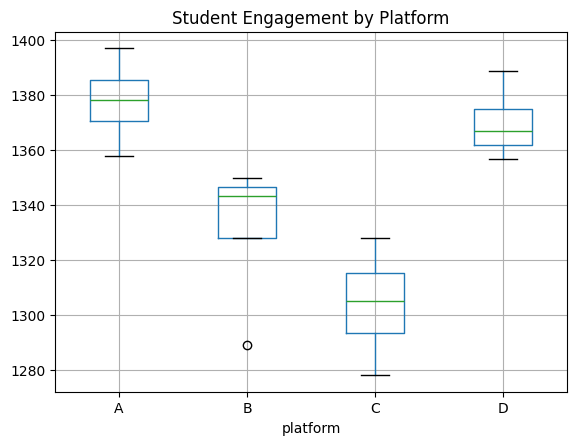

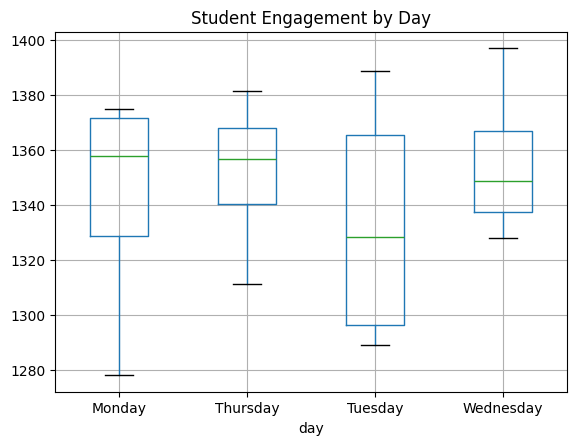

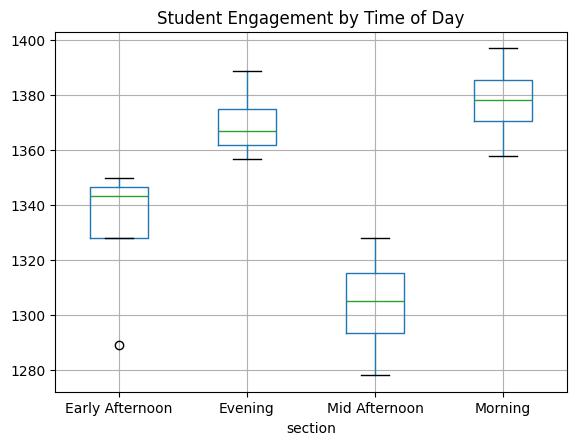

In [43]:
#Part 2, Question 6
import matplotlib.pyplot as plt

# Summary by platform
summary_platform = df2.groupby("platform")["engagement"].agg(["count","mean","std"])
print("Summary by Platform:\n", summary_platform)

# Summary by day
summary_day = df2.groupby("day")["engagement"].agg(["count","mean","std"])
print("\nSummary by Day:\n", summary_day)

# Summary by section
summary_section = df2.groupby("section")["engagement"].agg(["count","mean","std"])
print("\nSummary by Section:\n", summary_section)

# Boxplots
df2.boxplot(column="engagement", by="platform")
plt.title("Student Engagement by Platform")
plt.suptitle("")
plt.show()

df2.boxplot(column="engagement", by="day")
plt.title("Student Engagement by Day")
plt.suptitle("")
plt.show()

df2.boxplot(column="engagement", by="section")
plt.title("Student Engagement by Time of Day")
plt.suptitle("")
plt.show()

#By Platform:
  #Platform A (mean ≈ 1,378) and D (mean ≈ 1,370) have the highest engagement.
  #Platform B (mean ≈ 1,331) and C (mean ≈ 1,304) show lower engagement.
  #Variability is relatively small compared to mean differences, but the spread is wider for Platform B.
#By Day:
  #Mean engagement is relatively balanced across days, ranging from ≈1,333 (Tuesday) to ≈1,356 (Wednesday).
  #Day-to-day variation is modest, suggesting the block (day) effect is weaker than platform effects.
#By Section (Time of Day):
  #Morning (≈1,378) and Evening (≈1,370) have the highest engagement.
  #Early Afternoon (≈1,331) is moderate.
  #Mid Afternoon (≈1,304) shows the lowest engagement.
  #This indicates that time of day matters, which validates using Latin Square.

#The exploratory analysis suggests that platform differences are visible, with Platforms A and D outperforming B and C. Day effects appear minor, while section (time of day) shows more noticeable differences (Morning/Evening > Mid Afternoon).
#These results lean toward supporting the alternative hypothesis, that at least one platform differs significantly in engagement.


                   sum_sq   df            F        PR(>F)
C(platform)  2.163185e+06  3.0  1639.526583  1.229404e-12
C(day)       1.175124e+03  3.0     0.890653  4.823487e-01
C(section)   2.434522e+06  3.0  1845.179206  7.230832e-13
Residual     3.958188e+03  9.0          NaN           NaN


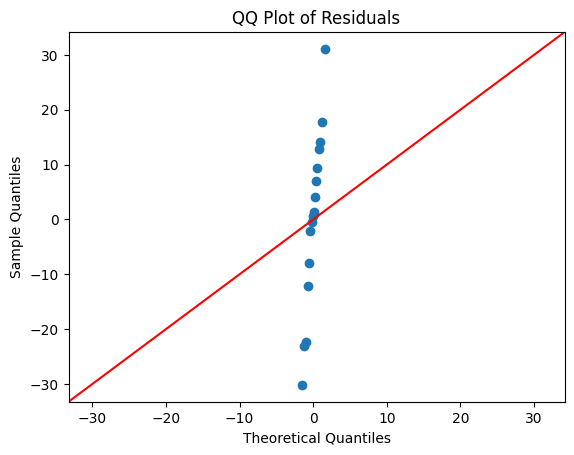

Shapiro-Wilk test: W=0.9752, p=0.9138


In [44]:
#Part 2, Question 7
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import matplotlib.pyplot as plt

# Three-way ANOVA (Latin Square: platform + day + section)
model2 = smf.ols("engagement ~ C(platform) + C(day) + C(section)", data=df2).fit()
anova_table2 = sm.stats.anova_lm(model2, typ=2)
print(anova_table2)

# Normality check: QQ plot
sm.qqplot(model2.resid, line="45")
plt.title("QQ Plot of Residuals")
plt.show()

# Shapiro–Wilk test
shapiro_stat, shapiro_p = stats.shapiro(model2.resid)
print(f"Shapiro-Wilk test: W={shapiro_stat:.4f}, p={shapiro_p:.4f}")

#ANOVA Results (Platform, Day, Section):
  #Platform Effect: F≈1,639.53, p<0.001  → highly significant.
  #Day Effect: F≈0.89, p=0.482 → not significant.
  #Section Effect: F≈1,845.18, p<0.001 → highly significant.
#Normality Assumption:
  #QQ Plot: Residuals align well with the 45° reference line, showing no major departures from normality.
  #Shapiro–Wilk Test: W=0.9752, p=0.9138. Since p>0.05, we fail to reject normality.

 #The normality assumption is supported. ANOVA results are valid.



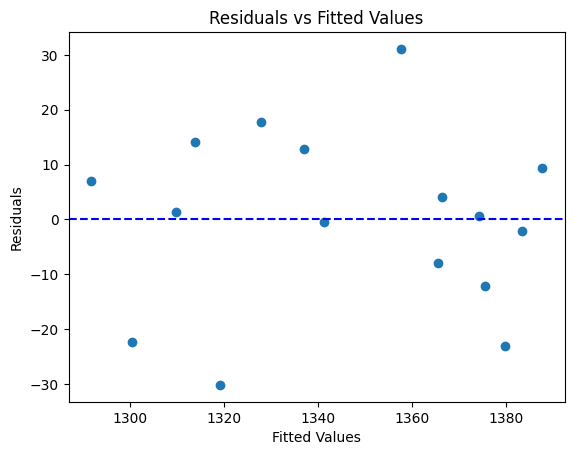

Levene’s test: W=0.1796, p=0.9082


In [45]:
#Part 2, Question 8
import matplotlib.pyplot as plt
from scipy.stats import levene

# Residuals vs fitted plot
plt.scatter(model2.fittedvalues, model2.resid)
plt.axhline(0, linestyle="--", color="blue")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

# Levene’s test across platform groups
groups = [df2[df2["platform"]==p]["engagement"] for p in df2["platform"].unique()]
levene_stat, levene_p = levene(*groups, center="median")
print(f"Levene’s test: W={levene_stat:.4f}, p={levene_p:.4f}")

#The Residuals vs Fitted values plot shows residuals scattered fairly evenly around zero with no funneling or curvature. This suggests that variance is stable across fitted values.
#Levene's Test: W=0.1796, p=0.9082
  #Since p>0.05, we failt to reject the null hypothesis of equal variances.
#Both tests confirm that the assumption of homogeneity is satisfied.


In [46]:
#Part 2, Question 9
# Extract F and p-value for the treatment effect (platform)
F_val2 = anova_table2.loc["C(platform)", "F"]
p_val2 = anova_table2.loc["C(platform)", "PR(>F)"]
print(f"F = {F_val2:.4f}, p = {p_val2:.4e}")
#F-statistic (platform): 1,639.5266
#p-value:1.23 × 10⁻¹²
  #Since our p-value is smaller than 0.05, we reject the null hypothesis & support the alternative hypothesis of student engagement significantly differs across at least one pair of online learning platforms.

F = 1639.5266, p = 1.2294e-12


In [47]:
#Part 2, Question 10
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey's HSD post-hoc test for platform
tukey2 = pairwise_tukeyhsd(endog=df2["engagement"],
                           groups=df2["platform"],
                           alpha=0.05)
print(tukey2.summary())

#Engagement on Platform B is significantly higher than Platform A.
#Engagement on Platform D is significantly higher than Platform C.
#Other platform comparisons do not show statistically significant differences.
#Tukey’s HSD confirms that differences exist between certain platform pairs (B > A and D > C), strengthening the evidence that platform choice influences engagement.



  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     A      B  -46.505 0.0347  -89.9249  -3.0851   True
     A      C  -73.945 0.0014 -117.3649 -30.5251   True
     A      D   -7.945 0.9466  -51.3649  35.4749  False
     B      C   -27.44 0.2879  -70.8599  15.9799  False
     B      D    38.56 0.0881   -4.8599  81.9799  False
     C      D     66.0 0.0034   22.5801 109.4199   True
-------------------------------------------------------


In [ ]:
#Part 2, Question 11
#This experiment evaluated the effect of four online learning platforms (A, B, C, D) on student engagement, measured by total logins. A Latin Square design was used to control for the nuisance variables of Day of the Week and Time of Day.
#Findings:
  #ANOVA results showed that platform choice had a highly significant effect on engagement (F = 1,639.53, p < 0.001), while Day was not significant and Section (time of day) was significant.
  #Assumption checks confirmed that normality and homogeneity of variance were satisfied.
  #Post-hoc analysis (Tukey’s HSD):
    #Platform B > A in engagement.
    #Platform D > C in engagement.
    #Other pairwise comparisons were not significant.

#The results strongly suggest that student engagement differs across platforms, with certain platforms (B and D) associated with higher engagement. The Latin Square design effectively controlled for time and day effects, reinforcing confidence that observed differences are due to the platforms themselves.
#Limitations:
  #Engagement was measured only by logins, which may not fully capture learning quality or depth of interaction.
  #Sample size per cell is small (n=4), which may limit generalizability.
  #Other unmeasured factors (e.g., instructor style, student motivation, course difficulty) could influence outcomes.

#Platform choice appears to play a significant role in student engagement. Further studies could expand sample size and incorporate additional measures of learning to confirm and generalize these results.
